# Project: Banking Marketing
## Part 1: Trends and Patterns

### Index Part 1:
## Dataset overview
## Objectives
## Exploratory Data Analysis

- Data review and checks
- Statistical description of data
- Target distribution
- Features distributions
- Atributes relationship

## Trends and patterns
- Target percentage per category
- Target percentage for numerical features
- Conlusions

## Conclusions
- Main conclusions
- Customer segmentation for marketing
- Recommendations for the marketing campaign

# Dataset overview

The data is related with direct marketing campaigns of a Portuguese bank, based on phone calls. The campaign objective was that the client subscribe a term deposit (deposit that a bank or a financial institution offers with a fixed rate, in which your money will be returned back at a specific maturity time).

Data was taken from May 2008 to November 2010.

**Source:** https://www.kaggle.com/datasets/hariharanpavan/bank-marketing-dataset-analysis-classification?resource=download

## Main characteristics of the dataset:

- The dataset has 45,211 instances
- It has 16 attributes and an ouptut target (yes/no)
- It has 7 features numerical and 9 features categorical
- It has 3 binary features
- It’s a highly imbalanced dataset (target has 11.7% of yes and 88.3% of no)

## Input features:

- Age: 	Age of customer
- Job:	Job of customer
- Martial:  Martial status of customer
- Education:  Customer education level
- Default:  Has credit in default?
- Housing:  If costumer has housing loan
- Loan:  Has Personal Loan
- Balance:  Customer's individual balance
- Contact:  Communication type
- Month:  Last contact month of year
- Day:  Last contact day of the month
- Duration:  Last contact duration, in seconds, this attribute highly affects the output target (e.g., if duration=0 then y='no')
- Campaign:  Number of contacts performed during this campaign and for this client
- Pdays: Number of days that passed by after the client was last contacted from a previous campaign
- Previous:  Number of contacts performed before this campaign and for this client
- Poutcome: outcome of the previous marketing campaign
- Y:  Target. If client subscribed a term deposit (binari: yes/no)

# Objectives

- Predict whether or not the client will subscribe a term deposit
- Find trends and patterns from the information provided to help prepare future marketing campaigns.

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
clients= pd.read_csv('bank-full.csv', engine='python')

In [3]:
clients.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Exploratory Data Analysis

## Data review and checks

In [4]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#We transform target in 0/1
clients['y']=clients['y'].map({'yes':1,'no':0})

We changed some variable names just to make them more understandable

In [6]:
clients.rename(columns = {'campaign': 'num_contacts', 'pdays': 'days_from_last_campaign', 'previous':'num_contacts_previous', 'poutcome': 'outcome_previous_campaign'}, inplace=True)


In [7]:
#Categorical columns
cat_columns= list(clients.select_dtypes(object).columns)
print(cat_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'outcome_previous_campaign']


In [8]:
#Numerical columns
num_columns= list(clients.select_dtypes(int).columns)
num_columns.remove('y')
print(num_columns)

['age', 'balance', 'day', 'duration', 'num_contacts', 'days_from_last_campaign', 'num_contacts_previous']


In [9]:
#Handling duplicate values
clients.duplicated().sum()

0

There aren't duplicated values in the dataset

In [10]:
# Check null values
clients.isnull().sum().sum()

0

There aren't null values in the dataset

## Statistical description of data

In [11]:
#Statistical description on numeric features
clients.describe().round(2)

,age,balance,day,duration,num_contacts,days_from_last_campaign,num_contacts_previous,y
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58,0.12
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30,0.32
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00,1.00


From the numerical data summary we can observe:
- Only in **age, day and num_contacts** the mean and mode are similar (maybe symmetrc distribution o data balanced in the mean). In the rest of features, mean and mode are quite different
- In **balance, duration, days_from_last_campaign, num_contacts_previous**, the max value are very high comparing with mean. It can be outliers or long cues
- In **campaign, days_from_last_campaign, num_contacts_previous** under the 3th quartile have the seam value and in the 4th quartile there are high values: there are many outliers and long cues


## Target distribution

In [12]:
clients.y.value_counts(normalize=True)

0    0.883015
1    0.116985
Name: y, dtype: float64

It’s a **highly imbalanced** dataset (target has 11.7% of yes and 88.3% of no)

## Features distributions

### 1.- Numerical features
We plot the distribution and the boxplot for the numerical features

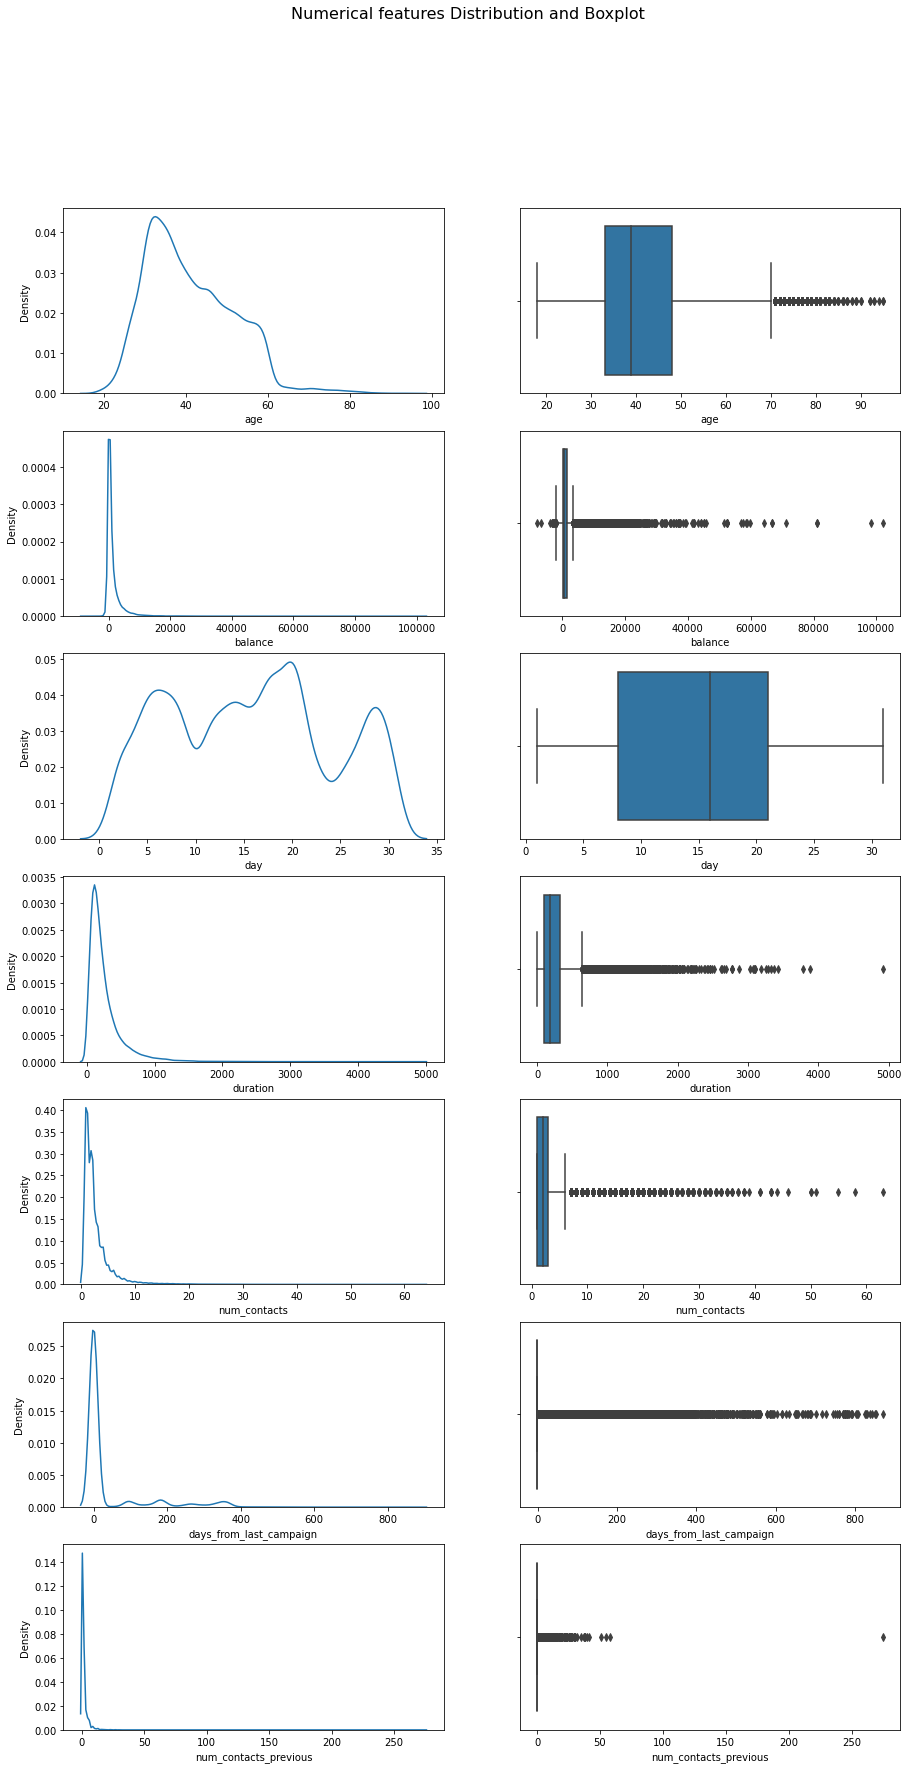

In [13]:
# Numerical features Distribution and boxplot
f, axes = plt.subplots(7,2, figsize = (15, 28))
f.suptitle('Numerical features Distribution and Boxplot', fontsize = 16 )
for i, column in enumerate(num_columns):
    sns.kdeplot(x=clients[column], data=clients, ax = axes[i][0]);
    sns.boxplot(x=clients[column], data=clients, ax = axes[i][1]);

From numerical features distributions and boxplots we observe:
- **balance, duration, num_contacts, days_from_last_campaign** and **num_contacts_previous** have outliers very far from the mode
- **balance, duration, num_contacts, days_from_last_campaign** and **num_contacts_previous** have long cues distributions
- Any feature has a normal distribution. None simetrical either

### 2.- Categorical features
We plot the distribution for the categorical features

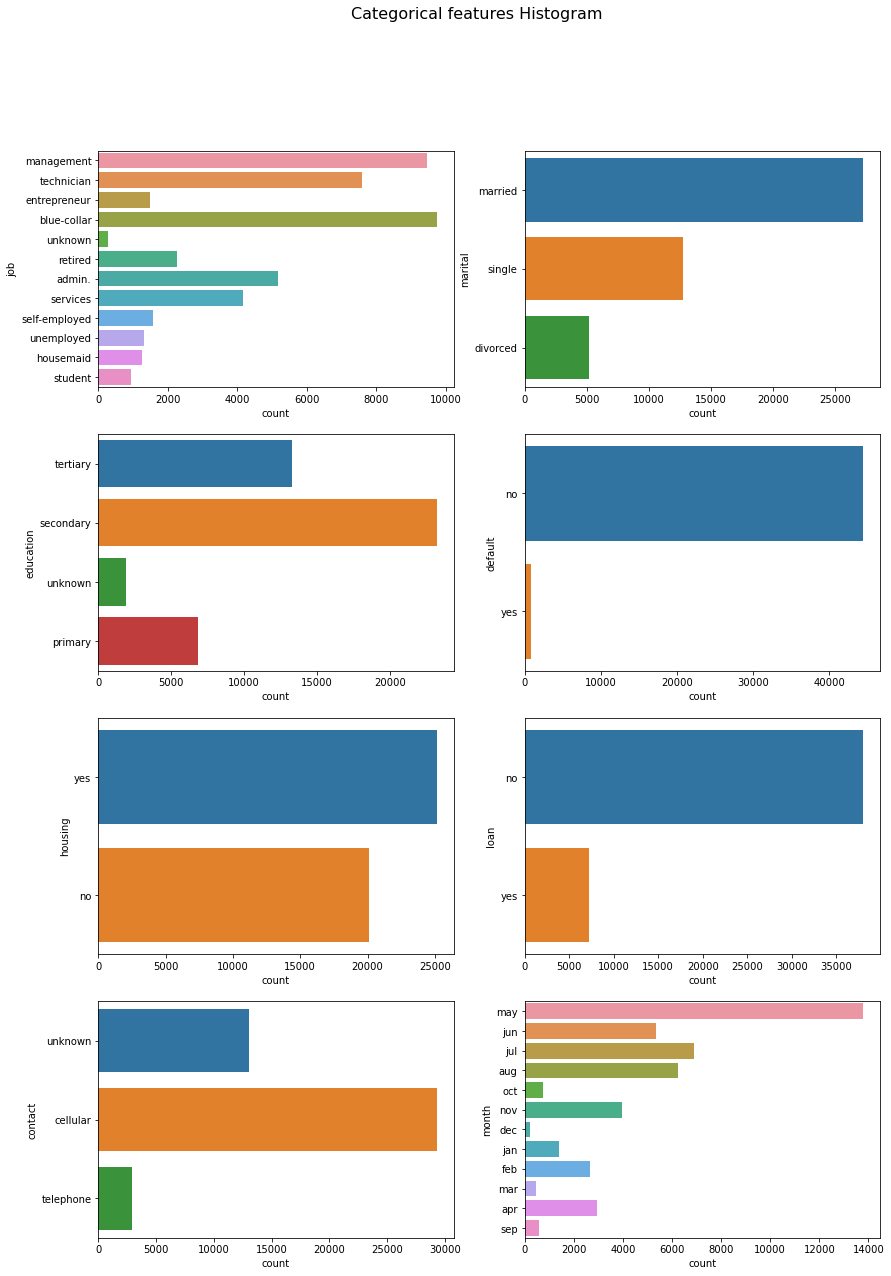

In [14]:
#Categorical features distribution
f, axes = plt.subplots(4,2, figsize = (14, 20))
f.suptitle('Categorical features Histogram', fontsize = 16 )
for i, ax in enumerate(axes.flatten()): 
    sns.countplot(y=clients[cat_columns].iloc[: , i], ax = ax); 

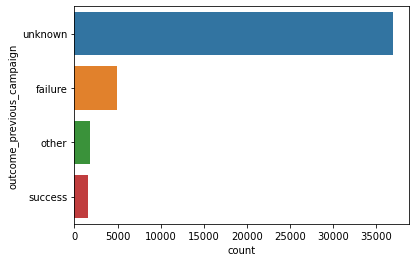

In [15]:
sns.countplot(y=clients['outcome_previous_campaign']);

# Target percentage

## Target percentage for category

For each category, we calculate:
- The sum of clients that target=1
- The total of clients
- The percentage of clients that target=1 over the total clients of the category

In [16]:
perc_category = pd.DataFrame(columns=['Category', 'sum', 'count', 'mean'])
for i in cat_columns:
    groups=clients.groupby([i])['y'].agg(['sum','count', 'mean'])
    df= groups.rename_axis('Category').reset_index()
    df['Category']= i +'-'+ df['Category']
    perc_category= perc_category.append(df)
perc_category.rename(columns = {'sum': 'Target_1', 'count': 'Total', 'mean':'Perc'}, inplace=True)
perc_category.sort_values(['Category'], ascending=False)


,Category,Target_1,Total,Perc
3,outcome_previous_campaign-unknown,3386,36959,0.091615
2,outcome_previous_campaign-success,978,1511,0.647253
1,outcome_previous_campaign-other,307,1840,0.166848
0,outcome_previous_campaign-failure,618,4901,0.126097
11,month-sep,269,579,0.464594
10,month-oct,323,738,0.437669
9,month-nov,403,3970,0.101511
8,month-may,925,13766,0.067195
7,month-mar,248,477,0.519916
6,month-jun,546,5341,0.102228


We represent graphically the target percentage of all categories and the target percentage of all clients (average).

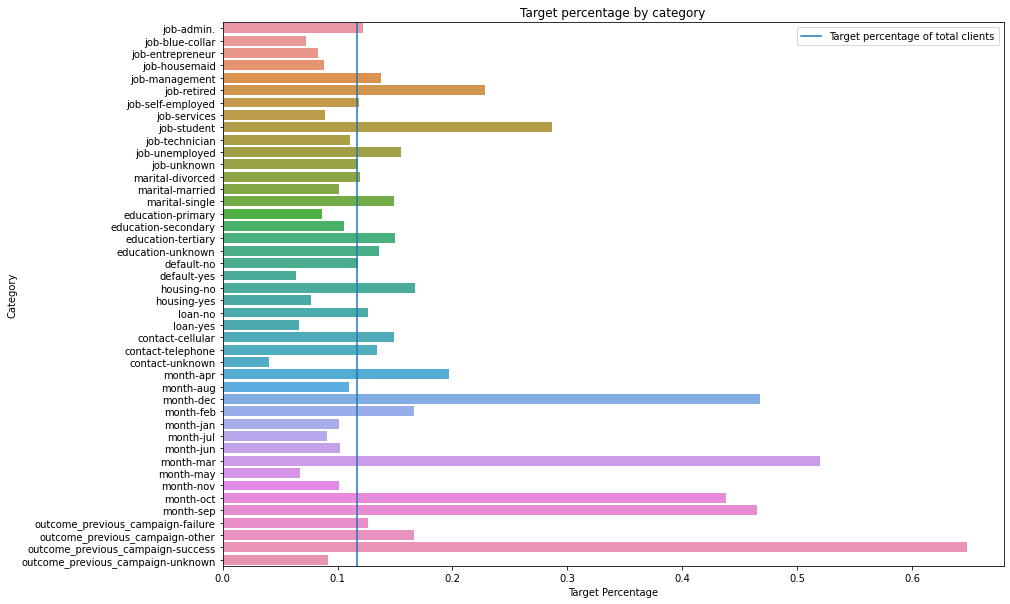

In [17]:
#Graphic representation of the percentage by category
plt.figure(figsize=(14,10))
sns.barplot(y=perc_category['Category'], x=perc_category['Perc'], data=perc_category).set(title= 'Target percentage by category');
plt.xlabel('Target Percentage')

plt.axvline(x=0.117, label='Target percentage of total clients');
plt.legend(loc = 'upper right');

We select the categories that have a target percentage significantly higher than the average target percentage (1.5 average target). 

In [18]:
perc_category[perc_category.Perc>0.1755].sort_values(['Perc'], ascending=False)

,Category,Target_1,Total,Perc
2,outcome_previous_campaign-success,978,1511,0.647253
7,month-mar,248,477,0.519916
2,month-dec,100,214,0.467290
11,month-sep,269,579,0.464594
10,month-oct,323,738,0.437669
8,job-student,269,938,0.286780
5,job-retired,516,2264,0.227915
0,month-apr,577,2932,0.196794


We select the categories that have a target percentage significantly lower than the average target percentage (0.6 average target). 

In [21]:
perc_category[perc_category.Perc<0.0702]

,Category,Target_1,Total,Perc
1,default-yes,52,815,0.063804
1,loan-yes,484,7244,0.066814
2,contact-unknown,530,13020,0.040707
8,month-may,925,13766,0.067195


## Target percentage for numerical features

To calculate the target trends for numerical features we do:
- Create bins for each numeric feature
- Calculate the target percentage for each bin

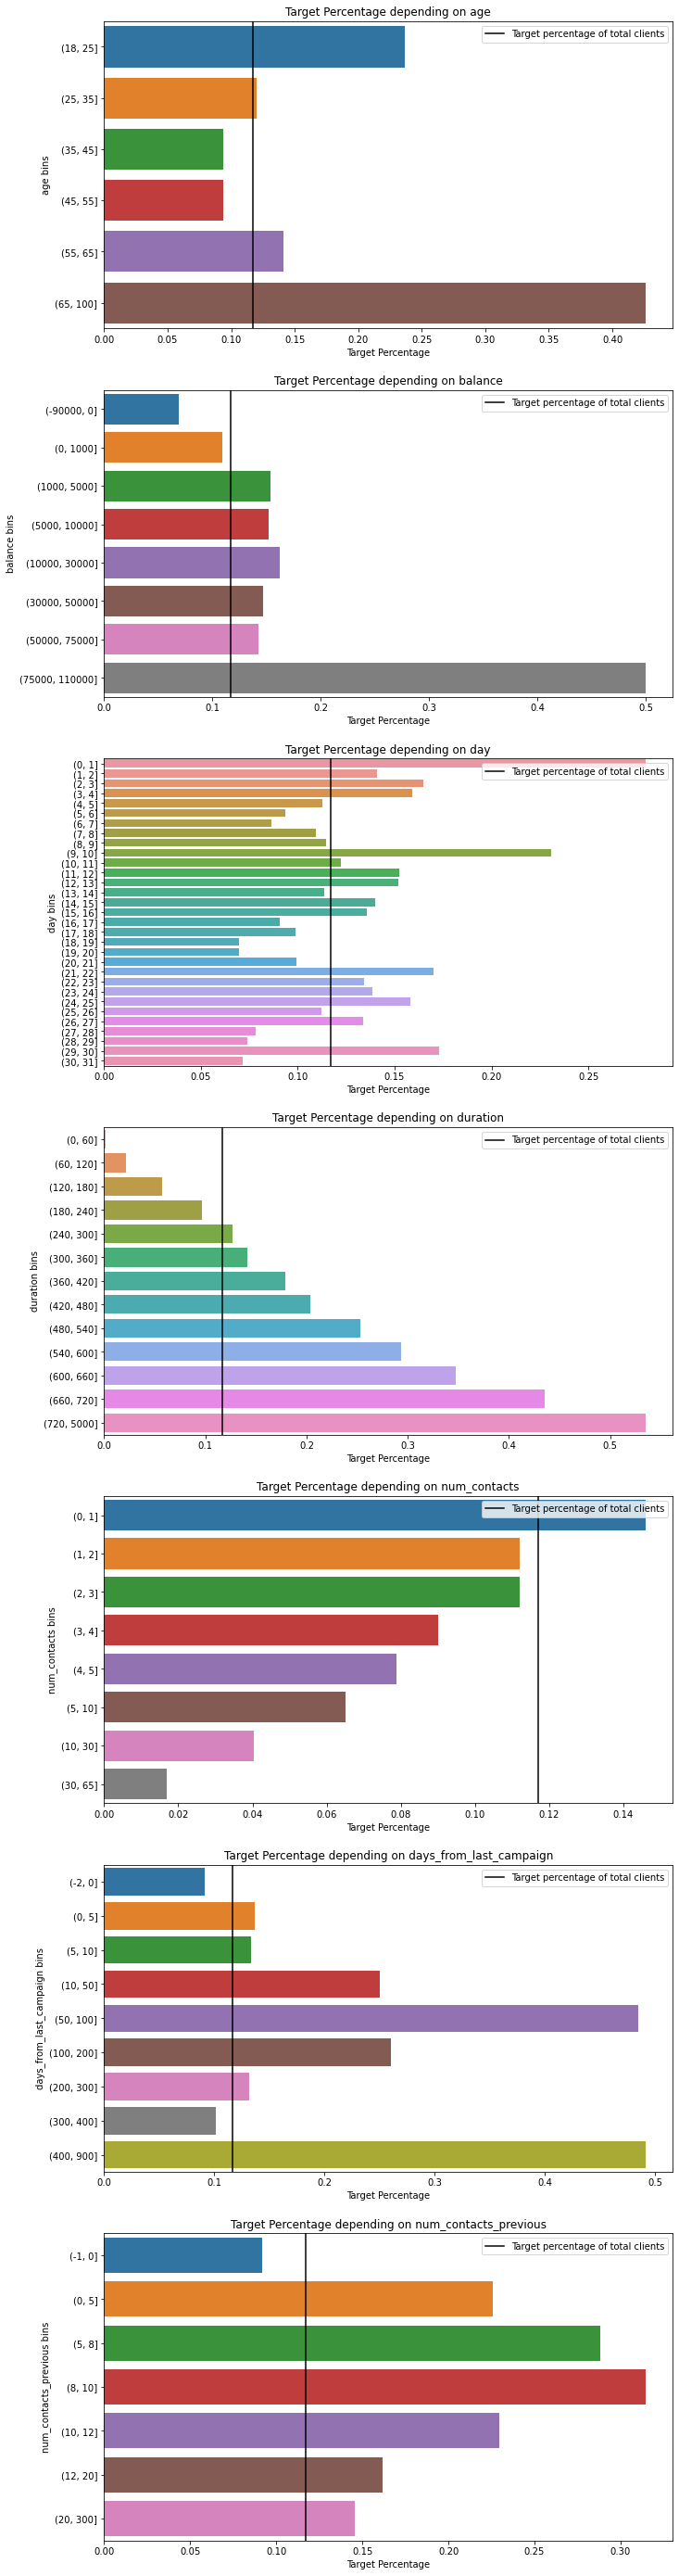

In [27]:
#We define the bins for each numeric variable
bins_num = [[18, 25, 35, 45, 55, 65, 100],
        [-90000, 0, 1000, 5000, 10000, 30000, 50000, 75000, 110000],
        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],
        [0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720,  5000],
        [0, 1, 2,3,4,5,10,30,65],
        [-2, 0, 5,10,50,100, 200,300,400,900],
        [-1, 0, 5,8, 10, 12,20,300]]

#Calculate and plotting results
perc_num = pd.DataFrame(columns=['column_bins', 'sum', 'count', 'mean'])
f, axes = plt.subplots(7,1, figsize = (11, 50))

for i, column in enumerate(num_columns):
    bins= bins_num[i]
    clients['column_bins'] = pd.cut(clients[column], bins)               #Group by bins
    mean_deposit = clients.groupby(['column_bins'])['y'].agg(['sum', 'count','mean'])
    
    df= mean_deposit.rename_axis('column_bins').reset_index()
    df['column_bins']= column + '-'+ df['column_bins'].astype(str)
    perc_num= perc_num.append(df)
    
    graph_title= 'Target Percentage depending on '+ column
    y_label= column + ' bins'
    sns.barplot(y=mean_deposit.index, x=mean_deposit['mean'], data=mean_deposit, ax = axes[i]).set(title=graph_title, ylabel=y_label,xlabel='Target Percentage');
    axes[i].axvline(x=0.117, label='Target percentage of total clients', color='black');
    axes[i].legend(loc = 'upper right');

perc_num.rename(columns = {'column_bins':'Category','sum': 'Target_1', 'count': 'Total','mean':'Perc'}, inplace=True)

We select the bins of numerical features that have a target percentage significantly higher than the average target percentage (2x average target). 

In [30]:
perc_num[perc_num.Perc>0.23]

,Category,Target_1,Total,Perc
0,"age-(18, 25]",313,1324,0.236405
5,"age-(65, 100]",320,751,0.426099
7,"balance-(75000, 110000]",2,4,0.500000
0,"day-(0, 1]",90,322,0.279503
9,"day-(9, 10]",121,524,0.230916
8,"duration-(480, 540]",282,1113,0.253369
9,"duration-(540, 600]",251,856,0.293224
10,"duration-(600, 660]",256,737,0.347354
11,"duration-(660, 720]",245,563,0.435169
12,"duration-(720, 5000]",1332,2490,0.534940


We select the the bins of numerical features that have a target percentage significantly lower than the average target percentage (0.6 average target). 

In [31]:
perc_num[perc_num.Perc<0.0702]

,Category,Target_1,Total,Perc
0,"balance-(-90000, 0]",502,7280,0.068956
18,"day-(18, 19]",122,1757,0.069437
19,"day-(19, 20]",192,2752,0.069767
0,"duration-(0, 60]",9,4763,0.001890
1,"duration-(60, 120]",202,9278,0.021772
2,"duration-(120, 180]",498,8616,0.057799
5,"num_contacts-(5, 10]",206,3159,0.065211
6,"num_contacts-(10, 30]",46,1137,0.040457
7,"num_contacts-(30, 65]",1,59,0.016949


# Conclusions, trends and patterns

## Main conlusions

It’s a **highly imbalanced dataset**, there are 11.7% of subscriptions of term deposit and and 88.3% of no subscriptions.    
Some trends:
- The highest ratio of subscriptions corresponds to customers who subscribed a product in the previous campaign (0.65)
- The optimal number of contacts is 1. If contacts increases, subscriptions percentages decreases
- The months with better percentage of subscriptions are mars, september, october and december. The day the 1st of the month
- Only clients with balance over than 75,000 Eu present considerable subscription ratios
- The optimal number of previous contacts before the marketing campaign are between 5 and 10.
- Respect the number of days passed after the previous campaign, we observe 2 groups whith considerable ratios:
    - Between 50 and 100 days
    - Between 400 and 900 days
- Clients over 65 years old present the better subscription ratios


## Customer segmentation for marketing

It is very interesting to have clients segmented according to the probability they have of subscribing a term deposit. This allows marketing department to optimize resources and apply different marketing strategies (customize campaigns, decide whether or not to apply a campaign, etc...). We define 3 main customer groups:
- Clients with a considerable probability of suscribing a deposit
- Clients with a very low probability of suscribing a deposit
- The rest of clients

### 1.- Clients with a considerable probability of suscribing a deposit


The following clients have the highest deposit subscription ratios, that is, they are **the most sensitive to the marketing campaign:**
- Clients who subscribed a product in the previous campaign
- Clients over 65 years old
- Clients with balance over 75,000 Eu
- Client job: studients

### 2.- Clients with a very low probability of suscribing a deposit

The following clients have the lowest deposit subscription ratios, that is, they are **the less sensitive to the marketing campaign:**
- Clients with a credit in default
- Clients with negative balance
- Clients with a personal loan
- Client job: blue-collar

### 3.- Rest of clients

The rest of the clients have a moderate sensitivity to marketing campaigns, with results around the average. It would depend on the type of campaign, when and how it is carried out, intensity, etc. to achieve better results.

## Recommendations for the marketing campaign

We list below some guidelines and recommendations for the design and execution of the campaign that can significantly increase the subscription ratio:
- Campaign frequency. There are 2 optimal windows to carry out campaigns: between 50 and 100 days or between 400 and 900 days
- The best months to carry out campaigns are march, september, october and december
- The best days of the month are the 1st and 10th
- Maintain contact with the client between the different campaigns. The optimal number of contacts is between 8 and 10
- Try to make the duration of the call as long as possible